<a href="https://colab.research.google.com/github/lailynurazizah/Case-Study-04-Data-Mining-Kelompok-E/blob/main/Case_Study_04_Kelompok_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **KELOMPOK E**

1.   Abiel Athaya Putra (2006532891)
2.   Aisyah Gefira (2006572945)
3.   Dewita Oktavia Nuur Marwan (2006531195)
4.   Evan Haryowidyatna (2006485011)
5.   Inez Aurellia Rosyana (2006571204)
6.   Laily Nur Azizah (2006464234)
7.   Nicholas Sky Salvatio (2006532701)




##**Problem Statement**



* Pada studi kasus kali ini bayangkan anda adalah seorang Data Analyst dari PT Ashrae Energy: https://www.ashrae.org/
* Tugas anda adalah melakukan proses Data Mining dengan menggunakan seluruh metode yang relevan/sesuai dan telah anda pelajari selama kuliah Data Mining hingga pertemuan terakhir. 
* Perlu diingat kembali bahwa dalam data mining tugas utama anda adalah mencari informasi/insight "non-trivial" sebanyak-banyaknya. Untuk hal tersebut anda perlu mendapatkan model yang optimal, tapi tidak selalu penting untuk mendapatkan model yang paling akurat (seperti machine learning).
* Data adalah " modifikasi " (Wrangling) dari data asli yang bersumber dari PT Ashrae : https://www.kaggle.com/competitions/ashrae-energy-prediction/data
* Sehingga permasalahan dan data understanding sama dengan asal data. Data yang akan digunakan adalah "rata-rata" penggunaan energi listrik dari berbagai gedung ( tidak lagi time-series / bergantung waktu).



# **Import Module**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

## **Pre-Processing**

In [ ]:
url = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv'
df = pd.read_csv(url)
df

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,1914.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,NaN,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,1997.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


Missing value pada kolom 'year_built' dan 'floor_count' memiliki total lebih dari 50% keseluruhan data sehingga kita putuskan untuk membuang kolom-kolom tersebut.

In [ ]:
df.drop(['year_built', 'floor_count'], axis = 1, inplace = True)
df

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   air_temperature     1413 non-null   float64
 4   cloud_coverage      1396 non-null   float64
 5   dew_temperature     1413 non-null   float64
 6   precip_depth_1_hr   1237 non-null   float64
 7   sea_level_pressure  1324 non-null   float64
 8   wind_direction      1413 non-null   float64
 9   wind_speed          1413 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 110.5+ KB


Kemudian setelah komprehensi data lebih lanjut, kami anggap kolom 'precip_depth_1_hr', 'sea_level_pressure', dan 'wind_direction' tidak memiliki korelasi signifikan dengan data yang akan kami olah sehingga kami buang kolom-kolom tersebut.

In [ ]:
df.drop(['precip_depth_1_hr', 'sea_level_pressure', 'wind_direction'], axis = 1, inplace = True)
df

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,wind_speed
0,237.749127,Education,7432,22.744816,2.998727,17.379328,3.391472
1,118.553743,Education,2720,22.744816,2.998727,17.379328,3.391472
2,23.626500,Education,5376,22.744816,2.998727,17.379328,3.391472
3,382.736016,Education,23685,22.744816,2.998727,17.379328,3.391472
4,1579.174237,Education,116607,22.744816,2.998727,17.379328,3.391472
...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,9.079138,1.092101,4.512823,3.619547
1409,4.732815,Education,4298,9.079138,1.092101,4.512823,3.619547
1410,7.211347,Entertainment/public assembly,11265,9.079138,1.092101,4.512823,3.619547
1411,187.117994,Lodging/residential,29775,9.079138,1.092101,4.512823,3.619547


Variabel precip_depth_1_hr, sea_level_pressure,wind_direction akan didrop karena variabel-variabel tersebut kami asumsikan tidak memberikan pengaruh pada meter reading.

Variabel yang kami pilih di antaranya 
- primary use, karena menurut kami intensitas penggunaan listrik bergantung pada jenis bangunan 
- square feet
- air temperature 
- cloud coverage 
- dew temperature 
- wind speed 



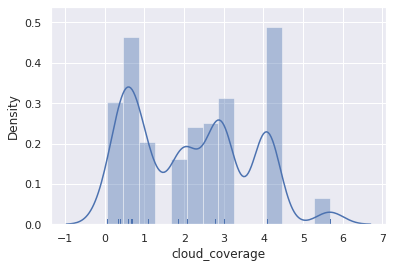

In [ ]:
p = sns.distplot(df['cloud_coverage'], kde=True, rug=True)

In [ ]:
df['cloud_coverage'] = df['cloud_coverage'].fillna(df['cloud_coverage'].mean())

Jika dilihat dari plot distribusi variabel cloud coverage, plotnya tidak memiliki kecenderungan untuk skew kanan ataupun kiri dan plotnya cenderung rata. Dengan demikian, akan dilakukan imputasi dengan menggunakan mean.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meter_reading    1413 non-null   float64
 1   primary_use      1413 non-null   object 
 2   square_feet      1413 non-null   int64  
 3   air_temperature  1413 non-null   float64
 4   cloud_coverage   1413 non-null   float64
 5   dew_temperature  1413 non-null   float64
 6   wind_speed       1413 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 77.4+ KB


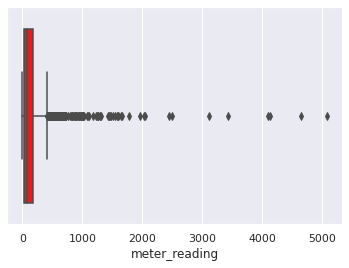

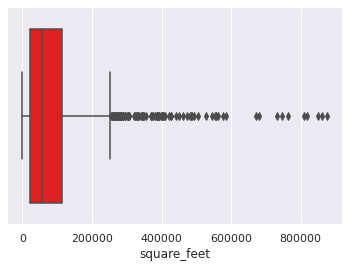

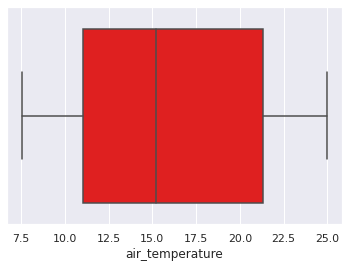

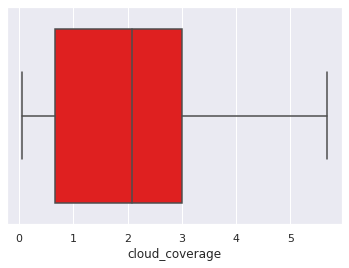

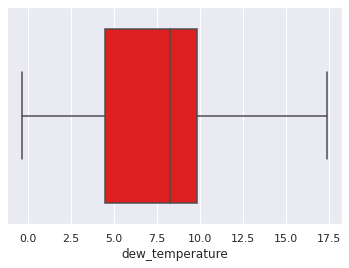

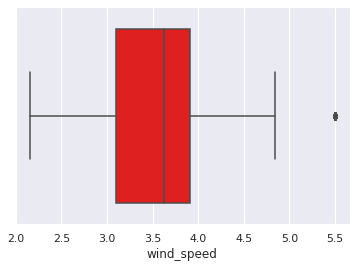

In [ ]:
cat_var = df.select_dtypes(include=['object']).columns.tolist()
num_var = df.select_dtypes(exclude=['object']).columns.tolist()

for i in range(len(num_var)):
    sns.boxplot(df[num_var[i]], color = "red", orient = "h")
    plt.show()

## **EDA**

                 meter_reading  square_feet  air_temperature  cloud_coverage  \
meter_reading         1.000000     0.583356        -0.034220        0.013167   
square_feet           0.583356     1.000000        -0.022617       -0.043972   
air_temperature      -0.034220    -0.022617         1.000000        0.095199   
cloud_coverage        0.013167    -0.043972         0.095199        1.000000   
dew_temperature      -0.017421    -0.076130         0.569026        0.094397   
wind_speed           -0.073006    -0.125481        -0.600079        0.412867   

                 dew_temperature  wind_speed  
meter_reading          -0.017421   -0.073006  
square_feet            -0.076130   -0.125481  
air_temperature         0.569026   -0.600079  
cloud_coverage          0.094397    0.412867  
dew_temperature         1.000000   -0.231857  
wind_speed             -0.231857    1.000000  


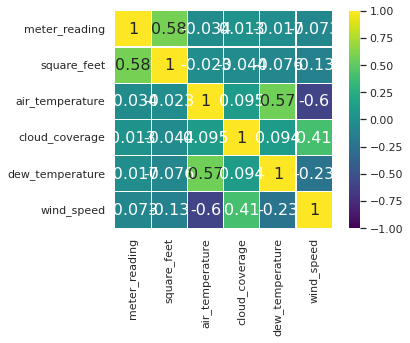

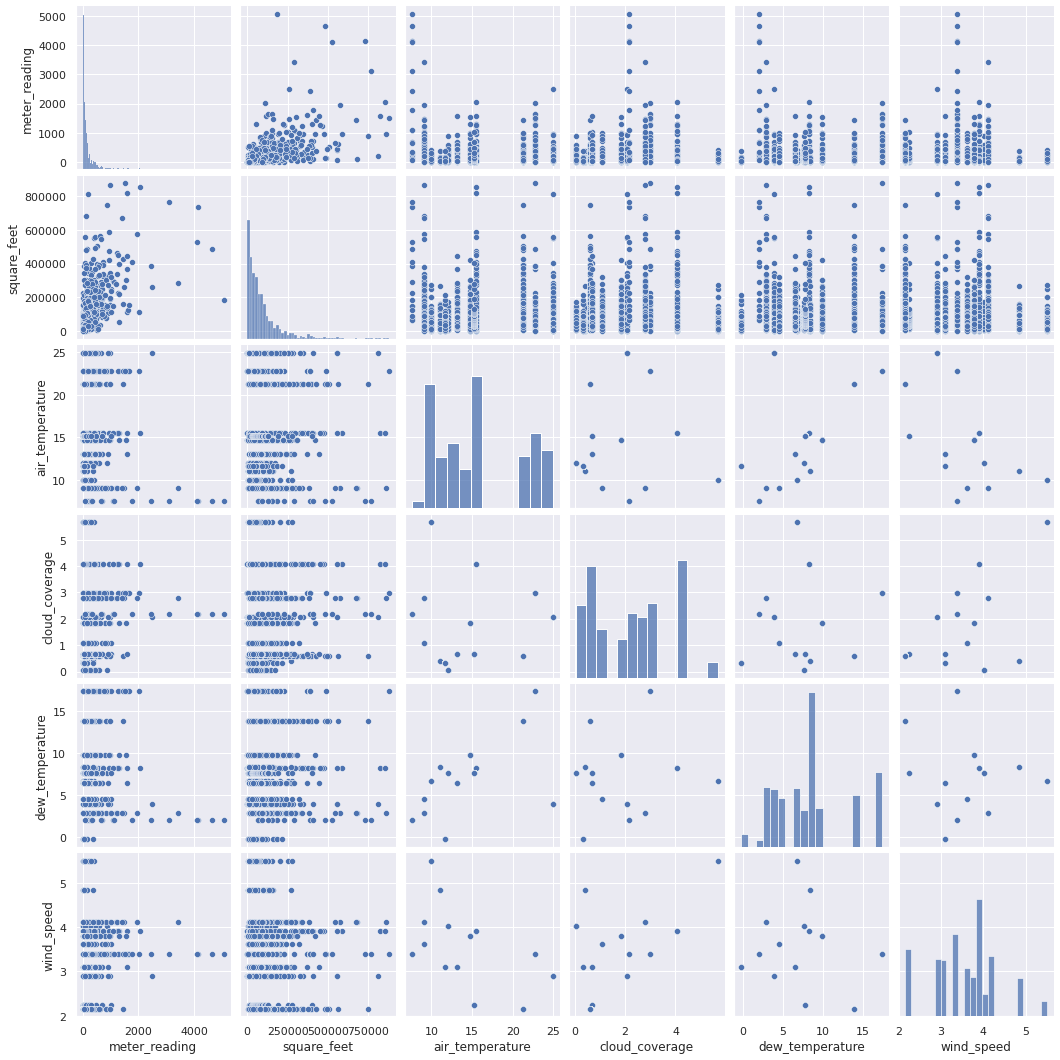

In [ ]:
print(df.corr())
sns.heatmap(df.corr(),cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True,
annot_kws={"size": 16}, square=True)
p = sns.pairplot(df)
p

Berdasarakan matriks korelasi, 
- Nilai 0.58 menunjukkan adanya korelasi positif linear yang moderat antara meter reading dengan square feet 
- Nilai 0.57 menunjukkan adanya korelasi positif linear yang moderat antara dew temperature dan air temperature
- Nilai -0.6 menununjukkan adanya korelasi negatif linear antara wind speed dengan air temperature 
- Nilai 0.4 menunjukkan adanya korelasi positif linear yang moderat antara cloud covering dengan wind speed
- Variabel lainnya memiliki nilai korelasi linear yang cenderung kecil. 

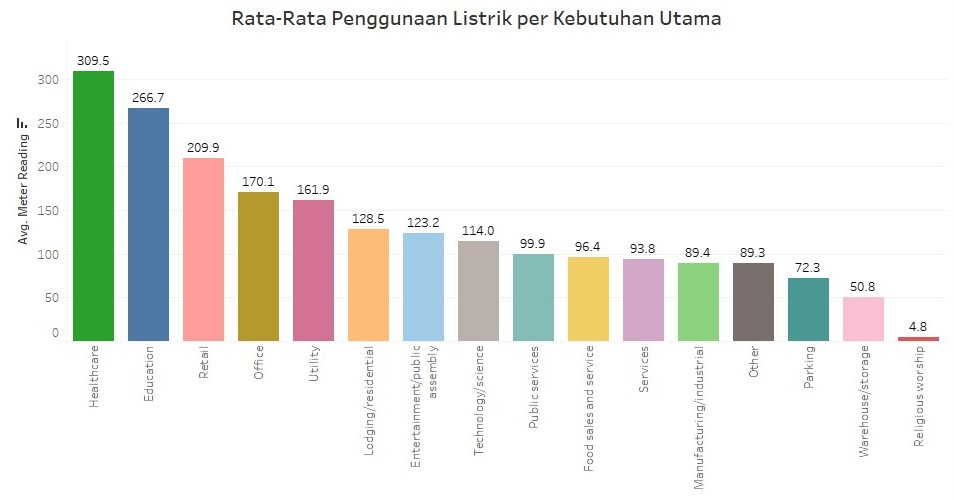

Berdasarkan plot tersebut, terlihat bahwa rata-rata penggunaan listrik paling tinggi terdapat pada sektor kebutuhan Healthcare (Kesehatan) dengan rata-rata penggunaan listrik sebesar 309.5 kBTU. Hal ini cukup masuk akal karena penggunaan mesin kesehatan banyak digunakan dengan listrik, seperti untuk instalasi peralatan radiologi dan alat medis lainnya, serta untuk menyediakan Ruang UPS (Uninterruptible Power Supply) pada ruang COT, ICU, dan ICCU. Sedangkan rata-rata penggunaan listrik paling rendah terdapat pada sektor kebutuhan Religion Worship (Ibadah) dengan rata-rata penggunaan listrik sebesar 4.8 kBTU, hal ini dikarenakan tidak banyak mesin yang perlu digunakan pada jenis kebutuhan ini.

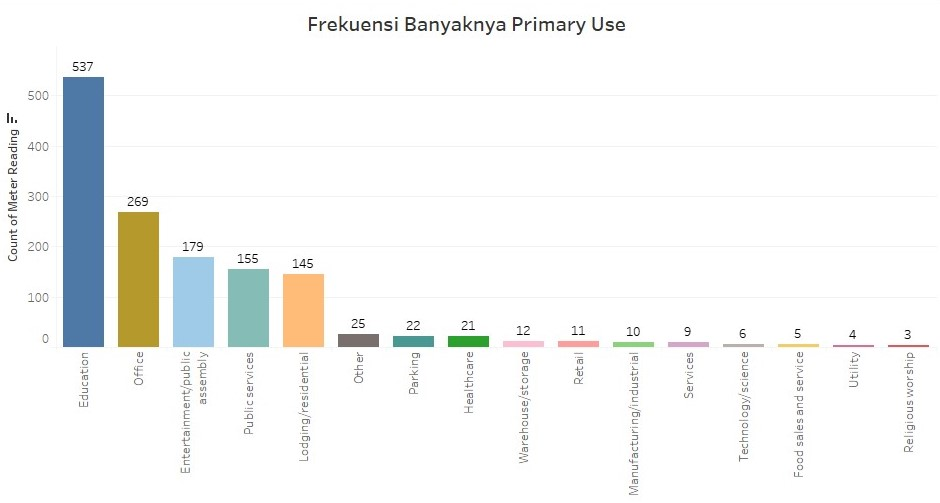

Dari plot tersebut terlihat bahwa frekuensi penggunaan listrik paling tinggi terdapat pada sektor education dengan penggunaan berjumlah 537 kali diikuti dengan perkantoran (269 kali), tempat publik (179 kali), pelayanan publik (155 kali), dan tempat tinggal (145 kali). Hal ini bisa dimaklumi dikarenakan banyaknya kegiatan dan pemakaian secara berulang pada tempat-tempat tersebut.

## **Korelasi dan Regresi**

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

lm = smf.ols("meter_reading ~ square_feet + air_temperature + cloud_coverage + dew_temperature + wind_speed", data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          meter_reading   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     150.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          7.07e-128
Time:                        09:29:58   Log-Likelihood:                -10077.
No. Observations:                1413   AIC:                         2.017e+04
Df Residuals:                    1407   BIC:                         2.020e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         215.9478     83.212      2.595      0.010      52.714     379.181
square_feet         0.0019   7.39e-05     26.315      0.000       0.002       0.002
air_temperature    -8.4888      2.491     -3.408      0.001     -13.376      -3.602
cloud_coverage     21.1761      6.945      3.049      0.002       7.551      34.801
dew_temperature     5.4450      2.158      2.523      0.012       1.211       9.679
wind_speed        -46.9651     17.464     -2.689      0.007     -81.224     -12.706
==============================================================================
Omnibus:                     1765.818   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           342753.149
Skew:                           6.423   Prob(JB):                         0.00
Kurtosis:                      78.211   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

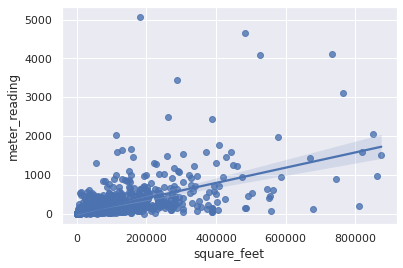

In [ ]:
p = sns.regplot(df.square_feet, df.meter_reading)

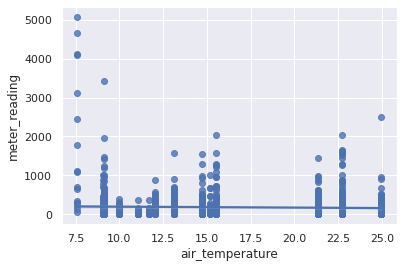

In [ ]:
p = sns.regplot(df.air_temperature, df.meter_reading)

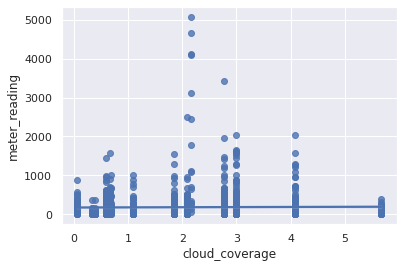

In [ ]:
p = sns.regplot(df.cloud_coverage, df.meter_reading)

In [ ]:
def forward_selected(data, response):
    """Linear model designed by forward selection.
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

## **Model yang Diasumsikan**

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

model = forward_selected(df, 'meter_reading')

print(model.model.formula)
print(model.rsquared_adj)

meter_reading ~ square_feet + primary_use + cloud_coverage + dew_temperature + air_temperature + wind_speed + 1
0.38840442455273216


In [ ]:
# Interpretasi koefisien
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     45.84
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          3.29e-137
Time:                        09:30:00   Log-Likelihood:                -10021.
No. Observations:                1413   AIC:                         2.008e+04
Df Residuals:                    1392   BIC:                         2.020e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Dari model ini, didapatkan hasil bahwa 

- Keseluruhan variabel memiliki nilai p-value < 0.05 sehingga data signifikan secara statistik. 
- Berdasarkan nilai $R^2$, didapatkan 0.348 maka dapat dikatakan bahwa model hanya menjelaskan 34.8% variansi dari data, sehingga model ini tidak terlalu bagus dan akurat untuk digunakan.

Coef menunjukkan seberapa banyak kenaikan 1 unit pada variabel bebas terhadap variabel terikat secara rata-rata. Sehingga, 
- setiap kenaikan 1 unit square feet akan meningkatkan 0.0019 meter reading secara rata-rata,
- setiap kenaikan 1 unit air temperature akan menurunkan 8.488 meter reading secara rata-rata, 
- setiap kenaikan 1 unit cloud coverage akan menaikkan 21.176 meter reading secara rata-rata, 
- setiap kenaikan 1 unit dew temperature akan menaikkan 5.445 meter reading secara rata-rata,
- setiap kenaikan  1 unit wind speed akan menurunkan 46.965 meter reading secara rata-rata. 

## **Model Keseluruhan**

In [ ]:
url1 = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv'
df1 = pd.read_csv(url1)

model1 = forward_selected(df1, 'meter_reading')

print(model1.model.formula)
print(model1.rsquared_adj)
print(model1.summary())

meter_reading ~ square_feet + floor_count + precip_depth_1_hr + 1
0.711054556712897
                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           4.85e-54
Time:                        09:30:00   Log-Likelihood:                -1494.1
No. Observations:                 203   AIC:                             2996.
Df Residuals:                     199   BIC:                             3009.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Berdasarkan model keseluruhan, didapatkan hasil bahwa : 

- Variabel floor count tidak signifikan secara statistik karena nilai p value > 0.05 , sedangkan variabel square feet dan percip depth 1 hr signifikan secara statistik dengan p value < 0.05
- $R^2$ model keseluruhan adalah 0.715 atau dapat dikatakan bahwa model keseluruhan dapat menjelaskan 71.5% variansi dari data 

Coef menunjukkan seberapa banyak kenaikan 1 unit pada variabel bebas terhadap variabel terikat secara rata-rata. Sehingga,
- setiap kenaikan square_feet sebanyak 1 unit, maka akan menaikkan meter reading sebanyak 0.0025 secara rata-rata, 
- setiap kenaikan floor_count sebanyak 1 unit, maka akan menaikkan meter reading sebanyak 10.7135 secara rata-rata,
- setiap kenaikan precip_depth_1_hr sebanyak 1 unit, maka akan menaikkan meter reading sebanyak 134.6661 secara rata-rata. 

## **Kesimpulan**

- Berdasarkan hasil analisis regresi yang telah kami lakukan, dapat disimpulan bahwa model pertama menghasilkan interpretasi yang lebih baik. Hal ini disebabkan semua parameter yang dihasilkan signifikan secara statistik meskipun memiliki nilai $R^2$  yang cenderung kecil. Dengan demikian, model yang kami asumsikan dinilai akan lebih masuk akal untuk digunakan.
- Berdasarkan summary model yang diasumsikan, koefisien untuk primary use Parking memiliki nilai yang paling rendah. Hal ini dapat diinterpretasikan bahwa tempat parkir memberikan kontribusi yang paling rendah terhadap konsumsi penggunaan listrik dengan asumsi menjaga nilai variabel lainnya tetap sama. 
- Berdasarkan summary model yang diasumsikan, koefisien untuk primary use Utility memiliki nilai yang paling tinggi. Hal ini dapat diinterpretasikan bahwa Utility memberikan kontribusi yang paling tinggi terhadap konsumsi penggunaan listrik dengan asumsi menjaga nilai variabel lainnya tetap sama.


## **Rekomendasi**

- Jika dilihat dari data yang diberikan, variabel floor count dan year memiliki banyak missing value. Kami memberikan rekomendasi kepada perusahaan terkait untuk menghimbau Data Engineer agar memperhatikan saat menginput data karena kedua variabel tersebut memiliki pengaruh dalam memprediksi meter reading. Semakin banyak jumlah lantai yang ada pada suatu gedung, maka semakin banyak listrik yang digunakan dan semakin tua umur bangunan, maka jumlah penggunaan listriknya semakin sedikit
- Berdasarkan summary model yang diasumsikan, Parking memberikan kontribusi  paling rendah dan Utility memberikan kontribusi paling tinggi terhadap konsumsi penggunaan listrik. Hal ini dapat dijadikan pertimbangan untuk perusahaan pemasok listrik untuk memberikan jatah pasokan listrik lebih banyak untuk bangunan Utility dibandingkan bangunan lainnya.